# Wrangle and Analyze Data Project

## Gather

In [1]:
# import libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import json
from timeit import default_timer as timer
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Let 's read the 'twitter-archive-enhanced.csv' into pandas DataFrame, 
the file was downloaded manually

In [2]:
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

twitter-archive-enhanced.csv file is stored in archive DataFrame called __archive__, it has 17 columns and 2356 entries

In [4]:
# Using the requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# Getting the response 
response = requests.get(url)
# writing content to file
with open((url.split('/')[-1]), mode = 'wb') as file:
        file.write(response.content)

In [5]:
# read image-predictions.tsv into a DataFrame
image = pd.read_csv('image-predictions.tsv', sep='\t')

In [6]:
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
image.shape


(2075, 12)

image-predictions.tsv file is stored in image DataFrame called __image__, it has 12 columns and 2075 entries

In [8]:
##Note that setting the tweet_mode parameter to 'extended' in the get_status call, 
## i.e., api.get_status(tweet_id, tweet_mode='extended'), can be useful.

# API keys and tokens
# Identifies the application
consumer_key = '8g8sj9gDq7IPpTZE3KgsBmHxc'
# Acts as a password for the application
consumer_secret  = 'tcj5f03vSgvxsoYdJ8xfUPivqn8d4rtmUpQCx2yBBR5FM5KFQ6'
# Identifies the user
access_token = '995582711577358336-6Y743HnHnEkFG0QO3lR7f73FxgrSYzI'
# Acts as a password for the user
access_secret = 'v4pg2n1kJl9tkgal69IMPTfWhttuy0y58h48nQJHOi7J6'

# creating an OAuthHandler instance. Into this we pass our consumer token and secret
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

# Sets token access
auth.set_access_token(access_token, access_secret)

# pass the auth object to tweepy API
api = tweepy.API(auth, 
                 wait_on_rate_limit=True,   # Whether or not to automatically wait for rate limits to replenish
                 wait_on_rate_limit_notify=True # Whether or not to print a notification when Tweepy is waiting for rate limits to replenish
                )


In [9]:
# https://stackoverflow.com/questions/27900451/convert-tweepy-status-object-into-json?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
for id_tweet in archive['tweet_id']:
    tweet = api.get_status(id_tweet, tweet_mode='extended')
    # object of tweepy itself is not JSON serializable, 
    #  but it has a _json property which contains JSON serializable response data
    print(json.dumps(tweet._json,indent = 4))
    break
    

{
    "created_at": "Tue Aug 01 16:23:56 +0000 2017",
    "id": 892420643555336193,
    "id_str": "892420643555336193",
    "full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
    "truncated": false,
    "display_text_range": [
        0,
        85
    ],
    "entities": {
        "hashtags": [],
        "symbols": [],
        "user_mentions": [],
        "urls": [],
        "media": [
            {
                "id": 892420639486877696,
                "id_str": "892420639486877696",
                "indices": [
                    86,
                    109
                ],
                "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg",
                "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg",
                "url": "https://t.co/MgUWQ76dJU",
                "display_url": "pic.twitter.com/MgUWQ76dJU",
                "expanded_url": "https://twitter.com/dog_rat

In [10]:
# list to store failed queries
retrieve_failed = []
# list to store successful queries
retrieve_success = []
# open tweet_json.txt file
# adding Twitter api json result to file
with open('tweet_json.txt', 'a', encoding='utf-8') as f:
    start = timer()
    for id_tweet in archive['tweet_id']:
        try: 
            tweet = api.get_status(id_tweet, tweet_mode='extended')
            f.write(json.dumps(tweet._json)+"\n")
            retrieve_success.append(id_tweet)

        except tweepy.TweepError as te:
            print (id_tweet, te.reason)
            retrieve_failed.append(id_tweet)

    end = timer()
    print(end-start)

888202515573088257 [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 [{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308 [{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977 [{'code': 144, 'message': 'No status found with that ID.'}]
802247111496568832 [{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464 [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 124
Rate limit reached. Sleeping for: 443


1925.016688919181


Failed to retrieve 11 Tweet IDs

In [11]:
len(retrieve_failed)

11

In [12]:
len(retrieve_success)

2345

In [13]:
# read tweet_json.txt line by line and store
# to DataFrame
with open('tweet_json.txt', "r") as file:
    data_json = pd.DataFrame(json.loads(line) for line in file)

In [14]:
data_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38833,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8597,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33263,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6317,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25059,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4192,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42209,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",40358,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9485,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [15]:
data_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2345 non-null object
display_text_range               2345 non-null object
entities                         2345 non-null object
extended_entities                2069 non-null object
favorite_count                   2345 non-null int64
favorited                        2345 non-null bool
full_text                        2345 non-null object
geo                              0 non-null object
id                               2345 non-null int64
id_str                           2345 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

json_tweet.txt which contains the json objects per line is now stored in __data_tweet__ DataFrame, it has 30 columns and 2345 entries

## Assessing

### archive DataFrame

In [16]:
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2285,667188689915760640,NaN,NaN,2015-11-19 03:52:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Quite an advanced dog here. Impressively dress...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667188689...,10,10,None,None,None,None,None
2100,670704688707301377,NaN,NaN,2015-11-28 20:43:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Danny. He's too good to look at the road ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670704688...,6,10,Danny,None,None,None,None
230,847978865427394560,NaN,NaN,2017-04-01 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Charlie. He fell asleep...,8.323699e+17,4.196984e+09,2017-02-16 23:23:38 +0000,https://twitter.com/dog_rates/status/832369877...,11,10,Charlie,None,None,None,None
2044,671533943490011136,NaN,NaN,2015-12-01 03:39:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Super rare dog here. Spiffy mohawk. Sharp mout...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671533943...,6,10,None,None,None,None,None
1378,701570477911896070,NaN,NaN,2016-02-22 00:53:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Yoda. He's a Zimbabwean Rutabaga. Frea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/701570477...,9,10,Yoda,None,None,None,None


In [17]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In the archive DataFrame, we directly notice that some rows have:
- `in_reply_to_status_id` (represents the original Tweet's ID)
- `in_reply_to_user_id` ( this filed is the representation of the original Tweet’s author ID)

Those rows represent a Tweet Replies to Original Tweets

Also to be checked the:
- retweeted_status_id
- retweeted_status_user_id
- retweeted_status_timestamp    

let's check the Dogs' names:

In [18]:
archive.name.value_counts()

None           745
a               55
Charlie         12
Lucy            11
Cooper          11
Oliver          11
Lola            10
Penny           10
Tucker          10
Bo               9
Winston          9
the              8
Sadie            8
an               7
Toby             7
Buddy            7
Daisy            7
Bailey           7
Scout            6
Jax              6
Rusty            6
Milo             6
Koda             6
Oscar            6
Stanley          6
Jack             6
Leo              6
Dave             6
Bella            6
Larry            5
              ... 
Dido             1
Covach           1
Chesney          1
Vinnie           1
Cupid            1
Jackie           1
Godi             1
Sailor           1
Willy            1
Linus            1
Autumn           1
infuriating      1
Ebby             1
Bloop            1
Tassy            1
Doobert          1
incredibly       1
Brooks           1
Ozzie            1
Asher            1
Mosby            1
Jomathan    

checking rating_numerator and rating_denominator, it seems some of them are wrong.<br>
But others have weird rating values, it turns out if the image includes more than one dog the denominator and numerator values increases and it is multiple of 10

In [19]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [20]:
archive[archive.rating_denominator > 10][['rating_numerator', 
                                          'rating_denominator']]

,rating_numerator,rating_denominator
342,11,15
433,84,70
784,9,11
902,165,150
1068,9,11
1120,204,170
1165,4,20
1202,50,50
1228,99,90
1254,80,80


checking the photo for this tweet, found that we have 9 dogs that's why rating_denominator is:<br>
9x10 = 90 <br>
while the rating_nominator is:<br>
9x11 = 99

In [21]:
archive[archive.rating_numerator == 99 ]['expanded_urls']

1228    https://twitter.com/dog_rates/status/713900603...
Name: expanded_urls, dtype: object

Check for Tweets that are not retweets and don't have photos

In [22]:
archive[(archive.expanded_urls.isnull()) &  (archive.in_reply_to_status_id.isnull())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
707,785515384317313025,NaN,NaN,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None


Checking for duplicated tweet IDs in archive 

In [23]:
sum(archive.tweet_id.duplicated())

0

In [24]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Tweets that don't have images in archive_clean

In [25]:
archive[archive.expanded_urls.isnull()]['tweet_id'].count()

59

Retweets that have images in archive_clean

### image DataFrame

In [26]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


There are 324 tweets images that were not predicted as dogs

In [27]:
image[(image.p1_dog == False) & (image.p2_dog == False) & (image.p3_dog == False)]['tweet_id'].count()

324

Example tweet_id = 667866724293877760, the prediction algorithm was not accurate in predicting the dog's breed, but in reality checking the tweet there is actually a dog in the image

In [28]:
image[image.tweet_id == 667866724293877760]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


Some Tweet IDs have the same jpg_url images in image DataFrame

In [29]:
image[image.jpg_url.duplicated()]['tweet_id'].count()

66

### data_json DataFrame

In [30]:
data_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2345 non-null object
display_text_range               2345 non-null object
entities                         2345 non-null object
extended_entities                2069 non-null object
favorite_count                   2345 non-null int64
favorited                        2345 non-null bool
full_text                        2345 non-null object
geo                              0 non-null object
id                               2345 non-null int64
id_str                           2345 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [31]:
data_json.describe()

,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count
count,2345.00000,2.345000e+03,7.800000e+01,7.800000e+01,2.600000e+01,2345.000000
mean,8073.24435,7.422940e+17,7.455079e+17,2.014171e+16,8.176271e+17,3028.098934
std,12147.58523,6.833642e+16,7.582492e+16,1.252797e+17,5.628443e+16,5036.809453
min,0.00000,6.660209e+17,6.658147e+17,1.185634e+07,7.061659e+17,0.000000
25%,1406.00000,6.783802e+17,6.757419e+17,3.086374e+08,7.906447e+17,607.000000
50%,3539.00000,7.189392e+17,7.038708e+17,4.196984e+09,8.331775e+17,1414.000000
75%,9980.00000,7.986979e+17,8.257804e+17,4.196984e+09,8.637581e+17,3526.000000
max,143504.00000,8.924206e+17,8.862664e+17,8.405479e+17,8.860534e+17,77422.000000


In [32]:
sum(data_json.id.duplicated())

0

### Quality

#### `archive dataframe:`
- Some Tweets are actually retweets
- Some Tweets are replies to Original Retweets for the the same user @dog_rates.
- Some Original Tweets have no images
- Erroneous data in rating numerator and denominator. Rating in some cases is related to the
number of dogs appearing in the image
- The rating is not unified some rating denominator is greater than 10, e.g 99/90 should become 11/10
- Some rating_denomiator values not a multiple of 10
- Some Dogs' names are innacurate and Wrong names found like 'a', 'an', 'the', 'his', 'officially', 'incredibly' ,'one'... etc
- Tweet_id 785639753186217984 is not a dog
- Nulls represented as (None) in 'name'
- timestamp column should have a datetime type                 

#### `image dataframe:` 
- predictions conclude that it is not a dog in the image or prediction alogorithm is
not accurate
- More than one dog stage found for few images though the image actually include only one dog
- Null is represented as None in'doggo', 'floofer', 'pupper','puppo' columns

#### `data_json:`
- column name id should be tweet_id to be used later on in joining with archive dataframe

### Tidiness

- In `archive:` 'doggo', 'floofer', 'pupper','puppo' columns should be joined under one column dog stage
- In `archive:` we should have rating column based on rating_numerator and rating_denominator
- add 'retweet_count', 'favorite_count' from `data_json` to `archive`
- In `image table:` add the breed prediction into one column then join to `archive`
- We should have one master dataset at the end
- in_reply_to_status_id, in_reply_to_user_id can be removed at the end 



### Clean

In [33]:
image_clean = image.copy()
archive_clean = archive.copy()
data_json_clean = data_json.copy()

#### Define
create 2 new columns __breed__ from `image` p1,p2 and p3 columns, and __prediction_confidence__
based on the Algorithm three possible dog's predictions (True or False)
if none of the three results are actually prediciting a dog in the image
a NaN value is filled


#### Code

In [34]:
## create 2 new columns breed & prediction_confidence

def get_breed_confidence(new_col, col1, col2, col3):
    '''Function that takes 4 arguments
    new_col: is the new columns to be created
    e.g breed or prediction confidence level
    based on col1, col2 and col3 conditions
    whehter it is True or False'''
    
    image_clean[new_col] = np.where(image_clean['p1_dog'] == True, image_clean[col1],
                np.where(image_clean['p2_dog'] == True, image_clean[col2],
                np.where(image_clean['p3_dog'] == True, image_clean[col3], np.nan)))

# populate breed column with the dog breed
get_breed_confidence('breed', 'p1', 'p2', 'p3')
# populate prediction_confidence with the level of the dog's breed
# predicted confidence
get_breed_confidence('prediction_confidence', 'p1_conf', 'p2_conf', 'p3_conf')



#### Test

In [35]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id                 2075 non-null int64
jpg_url                  2075 non-null object
img_num                  2075 non-null int64
p1                       2075 non-null object
p1_conf                  2075 non-null float64
p1_dog                   2075 non-null bool
p2                       2075 non-null object
p2_conf                  2075 non-null float64
p2_dog                   2075 non-null bool
p3                       2075 non-null object
p3_conf                  2075 non-null float64
p3_dog                   2075 non-null bool
breed                    1751 non-null object
prediction_confidence    1751 non-null float64
dtypes: bool(3), float64(4), int64(2), object(5)
memory usage: 143.9+ KB


In [36]:
image_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,prediction_confidence
1408,770293558247038976,https://pbs.twimg.com/media/CrCh5RgW8AAXW4U.jpg,1,Italian_greyhound,0.931668,True,Mexican_hairless,0.038896,True,whippet,0.013151,True,Italian_greyhound,0.931668
1902,851861385021730816,https://pbs.twimg.com/media/C8W6sY_W0AEmttW.jpg,1,pencil_box,0.662183,False,purse,0.066505,False,pillow,0.044725,False,NaN,NaN
1128,727685679342333952,https://pbs.twimg.com/media/ChlCQg-VIAQ_8g4.jpg,1,Border_collie,0.462408,True,collie,0.214556,True,Eskimo_dog,0.035604,True,Border_collie,0.462408
728,686386521809772549,https://pbs.twimg.com/media/CYaI5aaW8AE8Uyk.jpg,1,Yorkshire_terrier,0.477704,True,silky_terrier,0.171673,True,Australian_terrier,0.088334,True,Yorkshire_terrier,0.477704
759,688804835492233216,https://pbs.twimg.com/media/CY8gWFRWUAAm1XL.jpg,3,malinois,0.199512,True,German_shepherd,0.096797,True,Saluki,0.082848,True,malinois,0.199512
635,681231109724700672,https://pbs.twimg.com/media/CXQ4EwQWwAEVaUf.jpg,1,Irish_setter,0.406047,True,cocker_spaniel,0.345646,True,Airedale,0.147912,True,Irish_setter,0.406047
656,682259524040966145,https://pbs.twimg.com/media/CXffar9WYAArfpw.jpg,1,Siberian_husky,0.439670,True,Eskimo_dog,0.340474,True,malamute,0.101253,True,Siberian_husky,0.439670
262,670789397210615808,https://pbs.twimg.com/media/CU8fZSQWoAEVp6O.jpg,1,beagle,0.295966,True,basset,0.143527,True,bluetick,0.138992,True,beagle,0.295966
1916,854482394044301312,https://pbs.twimg.com/media/C9u7MtmV0AA741s.jpg,1,Chihuahua,0.260242,True,toy_poodle,0.189158,True,Labrador_retriever,0.144195,True,Chihuahua,0.260242
1402,768970937022709760,https://pbs.twimg.com/ext_tw_video_thumb/76896...,1,Pomeranian,0.182358,True,golden_retriever,0.110658,True,mousetrap,0.086399,False,Pomeranian,0.182358


image table have 2075 Tweet IDs out of which only 1075 Tweets have known breed based on the Algorithm predicitions. While in the archive table we have 2356 Tweet IDs due to the fact:
- Tweets without images (that we don't actually need) 
- Retweets (that also we don't need)
  



 



In [37]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Define

Let's get rid of Tweets without images, by merging `archive_clean` with the `image_clean` with
right_join to keep only tweet IDs found in `image_clean`

### Code

In [38]:
archive_clean = pd.merge(archive_clean,
                           image_clean[['tweet_id','jpg_url','img_num', 
                                      'breed', 'prediction_confidence']], 
                           on='tweet_id', how='right' )

### Test

In [39]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 21 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
jpg_url                       2075 

Some Tweet IDs have the same jpg_url images in image DataFrame
Following cheking in archive DataFrame, it appears that those are:
Retweet IDs related to the Original Tweet IDs

In [40]:
archive_clean[(archive_clean.breed.notnull())\
                & (archive_clean.retweeted_status_id.notnull())]['tweet_id'].count()



65

In [41]:
image_clean[image_clean.jpg_url.duplicated()]['tweet_id'].count()



66

In [42]:
image_clean[ (image_clean.tweet_id == 887473957103951883) | (image_clean.tweet_id == 888202515573088257)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,prediction_confidence
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.05495,True,beagle,0.038915,True,Pembroke,0.809197
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.05495,True,beagle,0.038915,True,Pembroke,0.809197


In [43]:
archive_clean[(archive_clean.tweet_id == 887473957103951883) | (archive_clean.tweet_id == 888202515573088257)]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,breed,prediction_confidence
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,...,10,Canela,None,None,None,None,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,...,10,Canela,None,None,None,None,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197


### Define
Remove retweets from `archive_clean` by removing rows with retweeted_status_id not Null

### Code

In [44]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

In [45]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 21 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
jpg_url                       1994 non

retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns can also be
removed by dropping those columns

In [46]:
archive_clean = archive_clean.drop(['retweeted_status_id', 
                                        'retweeted_status_user_id',
                                       'retweeted_status_timestamp'], axis=1)

### Test


In [47]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 18 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
breed                    1686 non-null object
prediction_confidence    1686 non-null float64
dtypes: float64(3), int64(4), object(11)
memory usage: 210.3+ KB


Let's check if the duplicated jpg_url found in image_clean are now removed

In [48]:
archive_clean[archive_clean.jpg_url.duplicated()]['tweet_id'].count()

0

### Define

Rename id in `data_json_clean` to tweet_id

### code

In [49]:
data_json_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

### Test

In [50]:
data_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2345 non-null object
display_text_range               2345 non-null object
entities                         2345 non-null object
extended_entities                2069 non-null object
favorite_count                   2345 non-null int64
favorited                        2345 non-null bool
full_text                        2345 non-null object
geo                              0 non-null object
tweet_id                         2345 non-null int64
id_str                           2345 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

### Define
merge  'retweet_count', 'favorite_count', 'in_reply_to_status_id_str' from `data_json_clean` to `archive_clean` based on tweet_id with left join on archive_clean to get the data
for Tweet ID found only in archive_clean<br>



### Code

In [51]:
archive_clean = pd.merge(left=archive_clean,
                          right=data_json_clean[['tweet_id','in_reply_to_status_id_str', 
                                                 'favorite_count', 'retweet_count']],
                           on='tweet_id', how='left')

### Test

In [52]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 21 columns):
tweet_id                     1994 non-null int64
in_reply_to_status_id        23 non-null float64
in_reply_to_user_id          23 non-null float64
timestamp                    1994 non-null object
source                       1994 non-null object
text                         1994 non-null object
expanded_urls                1994 non-null object
rating_numerator             1994 non-null int64
rating_denominator           1994 non-null int64
name                         1994 non-null object
doggo                        1994 non-null object
floofer                      1994 non-null object
pupper                       1994 non-null object
puppo                        1994 non-null object
jpg_url                      1994 non-null object
img_num                      1994 non-null int64
breed                        1686 non-null object
prediction_confidence        1686 non-null float6

### Assessing  in_reply_to_user_id and in_reply_to_status_id

In [53]:
# filtering based in_reply_to_status_id not null
# means replies to orginal tweets
archive_clean[archive_clean.in_reply_to_status_id.notnull()][['tweet_id', 'timestamp', 'text', 
                                                                  'name', 'breed',
                                                                  'in_reply_to_status_id_str', 'in_reply_to_user_id' ]]

,tweet_id,timestamp,text,name,breed,in_reply_to_status_id_str,in_reply_to_user_id
119,863079547188785154,2017-05-12 17:12:53 +0000,Ladies and gentlemen... I found Pipsy. He may ...,None,Lakeland_terrier,667152164079423490,4.196984e+09
146,856526610513747968,2017-04-24 15:13:52 +0000,"THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",None,Old_English_sheepdog,855818117272018944,4.196984e+09
192,844979544864018432,2017-03-23 18:29:57 +0000,PUPDATE: I'm proud to announce that Toby is 23...,None,Shetland_sheepdog,759099523532779520,4.196984e+09
419,802265048156610565,2016-11-25 21:37:47 +0000,"Like doggo, like pupper version 2. Both 11/10 ...",None,Labrador_retriever,733109485275860992,4.196984e+09
756,746906459439529985,2016-06-26 03:22:31 +0000,"PUPDATE: can't see any. Even if I could, I cou...",None,NaN,746885919387574272,4.196984e+09
758,746818907684614144,2016-06-25 21:34:37 +0000,Guys... Dog Jesus 2.0\n13/10 buoyant af https:...,None,Ibizan_hound,691416866452082688,4.196984e+09
855,729838605770891264,2016-05-10 01:00:58 +0000,"""Challenge completed"" \n(pupgraded to 12/10) h...",None,NaN,729113531270991872,4.196984e+09
1035,705786532653883392,2016-03-04 16:06:36 +0000,"Seriously, add us 🐶 11/10 for sad wet pupper h...",None,Labrador_retriever,703255935813287936,4.196984e+09
1044,704871453724954624,2016-03-02 03:30:25 +0000,I found a forest Pipsy. 12/10 https://t.co/mIQ...,None,Norfolk_terrier,667152164079423490,4.196984e+09
1059,703425003149250560,2016-02-27 03:42:44 +0000,Really guys? Again? I know this is a rare Alba...,None,miniature_pinscher,703041949650034688,4.196984e+09


Checking the in_reply_status_id_str and the in_reply_user_id, we notice that those replies 
to the orginal tweets for the the same user @dog_rates.

I am curious whether those 23 rows having in_reply_to_status_id not null (tweet replies of the original tweets) include an updated rating for the same dog in the original Tweet, that's why I have added in_reply_status_id_str from `data_json_clean` for better tracking:

looking for text containing 'upgrade' and is a reply to the orginal Tweet

In [54]:
archive_clean[archive_clean.in_reply_to_status_id.notnull()\
                & archive_clean.text.str.contains('upgrade')][['tweet_id', 'breed', 
                                                            'in_reply_to_status_id_str']]

,tweet_id,breed,in_reply_to_status_id_str
119,863079547188785154,Lakeland_terrier,667152164079423490
192,844979544864018432,Shetland_sheepdog,759099523532779520
855,729838605770891264,NaN,729113531270991872
1298,684538444857667585,Chihuahua,684481074559381504


Saving in_reply_to_status_id_str in in_reply_tweets to compare with the original 
retweets

In [55]:
in_reply_tweets=archive_clean[archive_clean.in_reply_to_status_id.notnull() \
                                & archive_clean.text.str.contains('upgraded')] ['in_reply_to_status_id_str']

Obtainging the original tweets


In [56]:
#Filtering on in_reply_status_id_str
archive_clean[archive_clean.tweet_id.isin(in_reply_tweets)][['tweet_id','breed']]

,tweet_id,breed
656,759099523532779520,Shetland_sheepdog
858,729113531270991872,NaN
1299,684481074559381504,Chihuahua
1932,667152164079423490,toy_poodle


It looks we have an updated rating for 4 dogs. Since this is only for 4 dogs we will stick to the original Tweets and remove Tweets replies

### Define

keep only columns where `in_reply_to_status_id` and `in_reply_to_user_id` Null <br>
drop columns in_reply_to_status_id,in_reply_to_user_id and in_reply_to_status_id_str

### Code

In [57]:
# Archive clean does not include replies to Original Tweets anymore
archive_clean = archive_clean[(archive_clean.in_reply_to_status_id.isnull()) &\
                                  (archive_clean.in_reply_to_user_id.isnull())]

In [58]:
#dropping in_reply_to_status_id,in_reply_to_user_id and in_reply_to_status_id_str
archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                             'in_reply_to_status_id_str'],axis=1, inplace=True)

### Test

In [59]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'jpg_url', 'img_num', 'breed',
       'prediction_confidence', 'favorite_count', 'retweet_count'],
      dtype='object')

In [60]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1993
Data columns (total 18 columns):
tweet_id                 1971 non-null int64
timestamp                1971 non-null object
source                   1971 non-null object
text                     1971 non-null object
expanded_urls            1971 non-null object
rating_numerator         1971 non-null int64
rating_denominator       1971 non-null int64
name                     1971 non-null object
doggo                    1971 non-null object
floofer                  1971 non-null object
pupper                   1971 non-null object
puppo                    1971 non-null object
jpg_url                  1971 non-null object
img_num                  1971 non-null int64
breed                    1666 non-null object
prediction_confidence    1666 non-null float64
favorite_count           1971 non-null int64
retweet_count            1971 non-null int64
dtypes: float64(1), int64(6), object(11)
memory usage: 207.9+ KB


### Define
Use pandas apply function to create a stage column out of doggo, pupper, floofer and puppo columns 

### Code

In [61]:
def get_dog_stage(archive_clean):
    '''Function that returns the dog stage
      based on columns doggo, floofer, pupper
      and puppo in archive_clean
      if more than one dog stage is found
      probably image includes more than one dog
      retrun 'more than one stage'
      if no dog stage return 'None'
      '''
    dog_stage = []
    if archive_clean['doggo'] == 'doggo':
        dog_stage.append(archive_clean['doggo'])
        
    if archive_clean['floofer'] == 'floofer':
        dog_stage.append(archive_clean['floofer'])
        
    if archive_clean['pupper'] == 'pupper':
        dog_stage.append(archive_clean['pupper'])
        
    if archive_clean['puppo'] == 'puppo':
        dog_stage.append(archive_clean['puppo'])
    
    else:
        if len(dog_stage) == 0:
             dog_stage.append('None')
    
    if len(dog_stage) > 1:
         return 'more than 1 stage'
    else:
        return (dog_stage[0])
    


archive_clean['stage'] = archive_clean.apply(get_dog_stage, axis=1)

### Test

In [62]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1993
Data columns (total 19 columns):
tweet_id                 1971 non-null int64
timestamp                1971 non-null object
source                   1971 non-null object
text                     1971 non-null object
expanded_urls            1971 non-null object
rating_numerator         1971 non-null int64
rating_denominator       1971 non-null int64
name                     1971 non-null object
doggo                    1971 non-null object
floofer                  1971 non-null object
pupper                   1971 non-null object
puppo                    1971 non-null object
jpg_url                  1971 non-null object
img_num                  1971 non-null int64
breed                    1666 non-null object
prediction_confidence    1666 non-null float64
favorite_count           1971 non-null int64
retweet_count            1971 non-null int64
stage                    1971 non-null object
dtypes: float64(1), int6

Those are the unique stage column's values, we have 10 tweets having more than 1 stage 

In [63]:
archive_clean['stage'].value_counts()

None                 1668
pupper                201
doggo                  63
puppo                  22
more than 1 stage      10
floofer                 7
Name: stage, dtype: int64

### Assessing tweets having more than one stage, but have only one dog in the image 

In [64]:
archive_clean[(archive_clean['stage'] == 'more than 1 stage') \
                & (~archive_clean['text'].str.contains('[bB]oth|and|&amp;|[T|t]hey'))][['tweet_id', 'text',
                                                                                    'stage', 'expanded_urls']]

,tweet_id,text,stage,expanded_urls
148,855851453814013952,Here's a puppo participating in the #ScienceMa...,more than 1 stage,https://twitter.com/dog_rates/status/855851453...
154,854010172552949760,"At first I thought this was a shy doggo, but i...",more than 1 stage,https://twitter.com/dog_rates/status/854010172...
340,817777686764523521,"This is Dido. She's playing the lead role in ""...",more than 1 stage,https://twitter.com/dog_rates/status/817777686...
425,801115127852503040,This is Bones. He's being haunted by another d...,more than 1 stage,https://twitter.com/dog_rates/status/801115127...
510,785639753186217984,This is Pinot. He's a sophisticated doggo. You...,more than 1 stage,https://twitter.com/dog_rates/status/785639753...
704,751583847268179968,Please stop sending it pictures that don't eve...,more than 1 stage,https://twitter.com/dog_rates/status/751583847...


#### Define
Since they are only 5, I will manually update the stage value based on the text and the image urls


### Code

In [65]:
archive_clean.loc[archive_clean.tweet_id == 855851453814013952, 'stage' ] = 'puppo'
archive_clean.loc[archive_clean.tweet_id == 854010172552949760, 'stage' ] = 'floofer'
archive_clean.loc[archive_clean.tweet_id == 817777686764523521, 'stage' ] = 'pupper'
archive_clean.loc[archive_clean.tweet_id == 801115127852503040, 'stage' ] = 'pupper'
archive_clean.loc[archive_clean.tweet_id == 751583847268179968, 'stage' ] = 'None'


### Test

In [66]:

archive_clean[archive_clean.tweet_id.isin(['855851453814013952', '854010172552949760',
                                           '817777686764523521', '801115127852503040',
                                          '751583847268179968'])]['stage']

148      puppo
154    floofer
340     pupper
425     pupper
704       None
Name: stage, dtype: object

### Define
removing row where tweet_id = 785639753186217984 since it is not a dog


### Code

In [67]:
## dropping this row since this is not a dog
archive_clean= archive_clean[archive_clean.tweet_id != 785639753186217984]

Let's replace the remaining stage value = 'more than 1 dog' with None

In [68]:
archive_clean.stage.replace('more than 1 stage', 'None', inplace=True)
archive_clean['stage'].value_counts()

None       1673
pupper      203
doggo        63
puppo        23
floofer       8
Name: stage, dtype: int64

### Define

in `archive_clean` replace 'None' stage column values with NaN 


### Code

In [69]:
archive_clean.stage.replace('None', np.nan, inplace=True)

### Test

In [70]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 1993
Data columns (total 19 columns):
tweet_id                 1970 non-null int64
timestamp                1970 non-null object
source                   1970 non-null object
text                     1970 non-null object
expanded_urls            1970 non-null object
rating_numerator         1970 non-null int64
rating_denominator       1970 non-null int64
name                     1970 non-null object
doggo                    1970 non-null object
floofer                  1970 non-null object
pupper                   1970 non-null object
puppo                    1970 non-null object
jpg_url                  1970 non-null object
img_num                  1970 non-null int64
breed                    1666 non-null object
prediction_confidence    1666 non-null float64
favorite_count           1970 non-null int64
retweet_count            1970 non-null int64
stage                    297 non-null object
dtypes: float64(1), int64

### Define 

1) in `archive_clean_t` DF, let's drop columns:
- doggo
- floofer
- pupper
- puppo

2) let's rename stage column to dog_stage

### Code

In [71]:
# dropping columns
archive_clean.drop(['doggo', 'floofer', 
                      'pupper', 'puppo'], axis=1, inplace=True)


In [72]:
# Renaming 'stage to 'dog_stage'
archive_clean.rename(columns={'stage': 'dog_stage'}, 
                     inplace=True)

### Test

In [73]:
list(archive_clean.columns.values)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'img_num',
 'breed',
 'prediction_confidence',
 'favorite_count',
 'retweet_count',
 'dog_stage']

In [74]:
pd.set_option('display.max_colwidth', -1)


### Assessing rating_numerator and rating_denominator

1) We have few tweets with text including more than one rating that we should take care of <br>
2) for tweet_id=810984652412424192, actually we don't have a rating but 24/7 was considered as rating

In [75]:
## looking for tweets with text containing 'rating' with 'and' or '&amp;' and another 'rating'
## checking tweets with more than one rating
archive_clean[archive_clean.text.str.contains('\d+\/\d+\s\&amp\;|and\s{0,1}\d+\/\d+.*')]\
                                [['tweet_id','text',
                                  'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
385,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
555,777684233540206592,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12,10
749,747600769478692864,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10,10
941,714258258790387713,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,10,10
1062,703356393781329922,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,9,10
1157,694352839993344000,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,10,10
1192,691483041324204033,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,5,10
1218,689835978131935233,Meet Fynn &amp; Taco. Fynn is an all-powerful leaf lord and Taco is in the wrong place at the wrong time. 11/10 &amp; 10/10 https://t.co/MuqHPvtL8c,11,10
1450,677314812125323265,"Meet Tassy &amp; Bee. Tassy is pretty chill, but Bee is convinced the Ruffles are haunted. 10/10 &amp; 11/10 respectively https://t.co/fgORpmTN9C",10,10
1484,676191832485810177,These two pups just met and have instantly bonded. Spectacular scene. Mesmerizing af. 10/10 and 7/10 for blue dog https://t.co/gwryaJO4tC,10,10


We have rating with numerator having decimal values that is not reflected in the generated rating_numerator, the latter is not showing the correct values 

In [76]:
## getting rows where text cotains decimal rating numerators
archive_clean[archive_clean.text.str.contains('\d+\.\d+\/\d+')] \
                                [['tweet_id','text',
                                  'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
39,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
503,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
553,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1374,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


### Define

* For tweets with more than one rating, sum the numerator of each individual rating together, and sum the denominator of each rating together to obtain a new rating:
 - e.g if we have 9/10 and 8/10 the result should be 17/20

* use a regular expression that matches decimal numerators to get the float points
* use modulo to check denominator if it is not a mulitple of 10 don't use it as rating


Then create a new column __rate2__ in `archive_clean` DF to add the newly generated rate.
And compare it with the orginial rate added in column __rate__ this way we can programmatically
asses the original rate.

In [77]:
archive_clean['rate'] = archive_clean['rating_numerator'].astype(str) + "/" + archive_clean['rating_denominator'].astype(str).map(str)


### Code


In [78]:
def add_new_rate(rate):
    ''' return a new rate2 column  format x/y
    if there is no rating in the tweet text
    return null.
    if rating denominator is a mulitple of 10
    keep it otherwise return Null
    if more than one rating sum numerators together
    and denominators together
    '''
    # no rating
    if len(rate) == 0:
        return np.nan
    # one rating
    if len(rate) == 1:
        # denominator multiple of 10
        if int(rate[0].split('/')[1]) % 10 == 0:
            return rate[0].lstrip('.')
        else:
            return np.nan
    # more than one rating   
    if len(rate) > 1:
        num = 0
        denom = 0
        for v in rate:
            if int(v.split('/')[1]) % 10 == 0:
                num += int(v.lstrip('.').split('/')[0])
                denom += int(v.lstrip('.').split('/')[1])
        return(str(num)+'/'+str(denom))

#new rate2 column added to archive_clean
archive_clean['rate2'] = archive_clean.text.str.findall('[\D*\w*\(?\.*\s?](\d*\.?\d+\/\d+){1,}\w*').apply(add_new_rate)

### Test
comparing original rate (obtained from rating_numerator and rating_denominator) and rate2, the difference found is in 37 rows

In [79]:
archive_clean[archive_clean.rate != archive_clean.rate2]['tweet_id'].count()

37

Let's test those rows manually and update the values where necessary

In [80]:
archive_clean[archive_clean.rate != archive_clean.rate2][['tweet_id',
                                                          'text','rate', 
                                                          'rate2','expanded_urls']]

,tweet_id,text,rate,rate2,expanded_urls
39,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5/10,13.5/10,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1"
385,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24/7,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1"
503,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75/10,9.75/10,https://twitter.com/dog_rates/status/786709082849828864/photo/1
553,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27/10,11.27/10,https://twitter.com/dog_rates/status/778027034220126208/photo/1
555,777684233540206592,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12/10,23/20,https://twitter.com/dog_rates/status/777684233540206592/photo/1
749,747600769478692864,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10/10,17/20,"https://twitter.com/dog_rates/status/747600769478692864/photo/1,https://twitter.com/dog_rates/status/747600769478692864/photo/1"
800,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9/11,14/10,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1"
891,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4/20,17/30,https://twitter.com/dog_rates/status/722974582966214656/photo/1
925,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50/50,61/60,https://twitter.com/dog_rates/status/716439118184652801/photo/1
941,714258258790387713,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,10/10,18/20,https://twitter.com/dog_rates/status/714258258790387713/photo/1


The new algorithm fixed the decimal values and most of the 'more than one rating' as expected.
But did not take care of few others that will updated them manually

In [81]:
archive_clean.loc[archive_clean.tweet_id == 722974582966214656, 'rate2'] ='13/10'
archive_clean.loc[archive_clean.tweet_id == 716439118184652801, 'rate2'] ='11/10'
archive_clean.loc[archive_clean.tweet_id == 696488710901260288, 'rate2'] = '12/10'
archive_clean.loc[archive_clean.tweet_id == 676957860086095872, 'rate2'] = '10/10'
archive_clean.loc[archive_clean.tweet_id == 75517828909424640, 'rate2'] = '12/10'
archive_clean.loc[archive_clean.tweet_id == 667044094246576128, 'rate2'] = '12/10'
archive_clean.loc[archive_clean.tweet_id == 666826780179869698, 'rate2'] = '12/10'

In [82]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 1993
Data columns (total 17 columns):
tweet_id                 1970 non-null int64
timestamp                1970 non-null object
source                   1970 non-null object
text                     1970 non-null object
expanded_urls            1970 non-null object
rating_numerator         1970 non-null int64
rating_denominator       1970 non-null int64
name                     1970 non-null object
jpg_url                  1970 non-null object
img_num                  1970 non-null int64
breed                    1666 non-null object
prediction_confidence    1666 non-null float64
favorite_count           1970 non-null int64
retweet_count            1970 non-null int64
dog_stage                297 non-null object
rate                     1970 non-null object
rate2                    1969 non-null object
dtypes: float64(1), int64(6), object(10)
memory usage: 200.1+ KB


In [83]:
archive_clean.rate2.value_counts()

12/10       444
10/10       406
11/10       390
13/10       254
9/10        149
8/10        93 
7/10        50 
14/10       34 
6/10        32 
5/10        30 
3/10        19 
4/10        14 
2/10        10 
17/20       4  
1/10        4  
19/20       3  
15/20       3  
21/20       2  
14/20       2  
84/70       1  
1776/10     1  
9/20        1  
420/10      1  
80/80       1  
20/20       1  
45/50       1  
165/150     1  
99/90       1  
23/20       1  
18/20       1  
0/10        1  
13.5/10     1  
13/20       1  
44/40       1  
88/80       1  
19/30       1  
9.75/10     1  
11.27/10    1  
16/20       1  
121/110     1  
11/20       1  
60/50       1  
11.26/10    1  
144/120     1  
204/170     1  
Name: rate2, dtype: int64

Since we have compared the original rate in __rate__ column, with the new rate in __rate2__ column <br>
We can drop columns: rate, rating_numerator and rating_denominator

In [84]:
archive_clean.drop(['rate', 'rating_numerator', 
                      'rating_denominator'], axis=1, inplace=True)



In [85]:
list(archive_clean.columns.values)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'name',
 'jpg_url',
 'img_num',
 'breed',
 'prediction_confidence',
 'favorite_count',
 'retweet_count',
 'dog_stage',
 'rate2']

### Define
1) Let's split rate2 column numerator and denominator into columns rating_numerator2 and rating_denominator2 <br>
2) And then unify the rating since in some cases we have more than one dog in the image
e.g 99/90 ( 90/10 = 9 dogs), the rating should be 11/10 (we will add it to `rating` column in archive_clean)

### Code

In [86]:
archive_clean = archive_clean[archive_clean.rate2.notnull()]

## splitting rate2 into rating_numerator2 and rating_denominator
archive_clean[['rating_numerator2', 'rating_denominator2']] = archive_clean.rate2.str.split('/', expand = True)

In [87]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1993
Data columns (total 16 columns):
tweet_id                 1969 non-null int64
timestamp                1969 non-null object
source                   1969 non-null object
text                     1969 non-null object
expanded_urls            1969 non-null object
name                     1969 non-null object
jpg_url                  1969 non-null object
img_num                  1969 non-null int64
breed                    1665 non-null object
prediction_confidence    1665 non-null float64
favorite_count           1969 non-null int64
retweet_count            1969 non-null int64
dog_stage                297 non-null object
rate2                    1969 non-null object
rating_numerator2        1969 non-null object
rating_denominator2      1969 non-null object
dtypes: float64(1), int64(4), object(11)
memory usage: 176.9+ KB


Unify the rating [numerator/(denominator/10)] as denominator is supposed to be 
a mulitple of 10

In [88]:
## creating new rating column based on [numerator/(denominator/10)] 
archive_clean['rating'] = archive_clean['rating_numerator2'].astype(float) / (archive_clean['rating_denominator2'].astype(int) / 10)
## roudning decimal values to 2 
archive_clean['rating']= archive_clean.rating.round(decimals=2)



In [89]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1993
Data columns (total 17 columns):
tweet_id                 1969 non-null int64
timestamp                1969 non-null object
source                   1969 non-null object
text                     1969 non-null object
expanded_urls            1969 non-null object
name                     1969 non-null object
jpg_url                  1969 non-null object
img_num                  1969 non-null int64
breed                    1665 non-null object
prediction_confidence    1665 non-null float64
favorite_count           1969 non-null int64
retweet_count            1969 non-null int64
dog_stage                297 non-null object
rate2                    1969 non-null object
rating_numerator2        1969 non-null object
rating_denominator2      1969 non-null object
rating                   1969 non-null float64
dtypes: float64(2), int64(4), object(11)
memory usage: 192.3+ KB


### Define
let's iterate over the archive_clean DF rows to match the text column based
on 8 regular expressions in order to extract the dogs' names when found and fill the remaining
with 'None'. The regular expresssions applied to match specific setences like:
- starts with 'This is ' followed by a word starting with a Capital letter
- starts with 'Say hello to ' followed by a word starting with a Capital letter
- starts with 'Here we have ' followed by a word starting with a Capital letter
- starts with 'Here is ' followed by a word  starting with a Capital letter
- starts with 'Meet ' followed by a word starting with a Capital letter
- starts with 'This is ' followed by a word with starting with a Capital letter
- starts with 'Here we have 'followed by a word with starting with a Capital letter
- Contains ' named ' followed by a word starting with a Capital letter

In case there is 2 dogs only the first name is taken into consideration only

### Code

In [90]:
n_name = []
n_name_index = []
## iterate over the archive_clean DF rows
for index, row in archive_clean.iterrows():
    #definiing the regular expressions to be used
    p1=re.compile('^This\sis\s([A-Z]{1,2}\w*)[\s\.,]')
    p2=re.compile('^Say\shello\sto\s([A-Z]{1,2}\w*)[\s\.,]')
    p3=re.compile('^Here\swe\shave\s([A-Z]{1,2}\w*)[\s\.,]')
    p4=re.compile('^Here\sis\s([A-Z]{1,2}\w*)[\s\.,]')
    p5=re.compile('^Meet\s([A-Z]{1,2}\w*)[\s\.,]')
    p6=re.compile('\snamed\s([A-Z]{1,2}\w*)[\s\.,]')
    p7=re.compile('\sThis\sis\s([A-Z]{1,2}\w*)[\s\.,]')
    p8=re.compile('^That\sis\s([A-Z]{1,2}\w*)[\s\.,]')
    # append DF index to n_nam_index list
    # if there is a match appending the name
    # to n_name list
    if p1.findall(row.text):
        print('p1 ' + p1.findall(row.text)[0])
        n_name.append(p1.findall(row.text)[0])
        n_name_index.append(index)
    
    elif p2.findall(row.text):
        print('p2 ' + p2.findall(row.text)[0])
        n_name.append(p2.findall(row.text)[0])
        n_name_index.append(index)
   
    elif p3.findall(row.text):
        print('p3 ' + p3.findall(row.text)[0])
        n_name.append(p3.findall(row.text)[0])
        n_name_index.append(index)
   
    elif  p4.findall(row.text):
        print('p4 ' + p4.findall(row.text)[0])
        n_name.append(p4.findall(row.text)[0]) 
        n_name_index.append(index)
        
    elif  p5.findall(row.text):
        print('p5 ' + p5.findall(row.text)[0])
        n_name.append(p5.findall(row.text)[0]) 
        n_name_index.append(index)
        
    elif p6.findall(row.text):
        print('p6 ' + p6.findall(row.text)[0])
        n_name.append(p6.findall(row.text)[0])
        n_name_index.append(index)
        
    elif p7.findall(row.text):
        print('p7 ' + p7.findall(row.text)[0])
        n_name.append(p7.findall(row.text)[0])
        n_name_index.append(index)
        
    elif  p8.findall(row.text):
        print('p8 ' + p8.findall(row.text)[0])
        n_name.append(p8.findall(row.text)[0]) 
        n_name_index.append(index)
    # in case no match append 'None'
    else:
        n_name.append('None')    
        n_name_index.append(index)

# generating pandas series from n_name list and create a new_name
# column
archive_clean['new_name'] = pd.Series(n_name, index=n_name_index)

p1 Phineas
p1 Tilly
p1 Archie
p1 Darla
p1 Franklin
p5 Jax
p1 Zoey
p1 Cassie
p1 Koda
p1 Bruno
p1 Ted
p1 Stuart
p1 Oliver
p1 Jim
p1 Zeke
p1 Ralphus
p1 Gerald
p1 Jeffrey
p1 Canela
p1 Maya
p1 Mingus
p1 Derek
p1 Roscoe
p1 Waffles
p7 Jimbo
p1 Maisey
p1 Earl
p1 Lola
p1 Kevin
p5 Yogi
p1 Noah
p1 Bella
p5 Grizzwald
p1 Rusty
p1 Gus
p1 Stanley
p1 Alfy
p1 Koko
p1 Rey
p1 Gary
p5 Elliot
p1 Louis
p1 Bella
p5 Jesse
p1 Romeo
p1 Bailey
p1 Duddles
p1 Jack
p1 Steven
p1 Beau
p1 Snoopy
p5 Shadow
p1 Emmy
p1 Aja
p1 Penny
p5 Dante
p1 Nelly
p1 Ginger
p1 Benedict
p5 Venti
p1 Goose
p5 Nugget
p5 Cash
p1 Jed
p1 Sebastian
p1 Sierra
p1 Monkey
p1 Harry
p1 Kody
p2 Lassie
p1 Rover
p1 Napolean
p1 Boomer
p1 Cody
p1 Zoey
p1 Rumble
p5 Clifford
p1 Dewey
p5 Stanley
p1 Scout
p1 Gizmo
p1 Walter
p2 Cooper
p5 Harold
p1 Shikha
p1 Lili
p1 Jamesy
p1 Coco
p5 Boomer
p1 Sammy
p1 Nelly
p1 Meatball
p1 Paisley
p1 Albus
p1 Neptune
p1 Belle
p2 Quinn
p1 Zooey
p1 Dave
p1 Jersey
p1 Hobbes
p1 Burt
p5 Lorenzo
p1 Carl
p1 Jordy
p5 Milky
p5 Trooper


### Test

In [91]:
# checking where the new_name column and the current name column differ
archive_clean[archive_clean.name != archive_clean.new_name]['name'].count()

106

In [92]:
archive_clean[archive_clean.name != archive_clean.new_name][['text', 'name', 'new_name']] 

,text,name,new_name
21,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,such,None
49,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a,None
135,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,quite,None
149,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",quite,None
275,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",one,None
397,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,None,Burke
404,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,incredibly,None
472,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a,None
561,This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,O,None
582,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,a,None


In [93]:
# only update name O'Malley and  Fred-Rick Manually
# all other are OK
archive_clean.loc[archive_clean.text.str.contains("O'Malley"), 'new_name' ] = "O'Malley"
archive_clean.loc[archive_clean.text.str.contains("Fred-Rick"), 'new_name' ] = "Fred-Rick"



In [94]:
archive_clean['new_name'].value_counts()

None       597
Charlie    11 
Lucy       10 
Cooper     10 
Oliver     10 
Tucker     9  
Penny      9  
Winston    8  
Sadie      8  
Daisy      7  
Toby       7  
Lola       7  
Jax        6  
Koda       6  
Stanley    6  
Bo         6  
Bella      6  
Buddy      5  
Dave       5  
Rusty      5  
Leo        5  
Scout      5  
Bailey     5  
Milo       5  
Oscar      5  
Chester    5  
Louis      5  
Finn       4  
Jerry      4  
Sophie     4  
          ..  
Astrid     1  
Chesney    1  
Cupid      1  
Jersey     1  
Anna       1  
Godi       1  
Nida       1  
Sailor     1  
Cora       1  
Karma      1  
Olaf       1  
Autumn     1  
Sierra     1  
Ebby       1  
Bloop      1  
Tassy      1  
Doobert    1  
Brooks     1  
Willy      1  
Mosby      1  
Remy       1  
Logan      1  
Ralf       1  
Kenny      1  
Aldrick    1  
Creg       1  
Joshwa     1  
Staniel    1  
Dante      1  
Murphy     1  
Name: new_name, Length: 933, dtype: int64

### Define
Let's drop the old name column _name_ and rename the newly generated column "new_name" to _name_

### Code

In [95]:
archive_clean.drop(['name'],
                     axis=1, inplace=True)

In [96]:
archive_clean.rename(columns = {"new_name": "name"}, 
                       inplace=True)

### Test

In [97]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1993
Data columns (total 17 columns):
tweet_id                 1969 non-null int64
timestamp                1969 non-null object
source                   1969 non-null object
text                     1969 non-null object
expanded_urls            1969 non-null object
jpg_url                  1969 non-null object
img_num                  1969 non-null int64
breed                    1665 non-null object
prediction_confidence    1665 non-null float64
favorite_count           1969 non-null int64
retweet_count            1969 non-null int64
dog_stage                297 non-null object
rate2                    1969 non-null object
rating_numerator2        1969 non-null object
rating_denominator2      1969 non-null object
rating                   1969 non-null float64
name                     1969 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 192.3+ KB


### Define
Finally let's replace 'None' values in _name_  column with NaN

### Code

In [98]:
archive_clean.name.replace('None', np.nan,
                            inplace=True)

### Test

In [99]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1993
Data columns (total 17 columns):
tweet_id                 1969 non-null int64
timestamp                1969 non-null object
source                   1969 non-null object
text                     1969 non-null object
expanded_urls            1969 non-null object
jpg_url                  1969 non-null object
img_num                  1969 non-null int64
breed                    1665 non-null object
prediction_confidence    1665 non-null float64
favorite_count           1969 non-null int64
retweet_count            1969 non-null int64
dog_stage                297 non-null object
rate2                    1969 non-null object
rating_numerator2        1969 non-null object
rating_denominator2      1969 non-null object
rating                   1969 non-null float64
name                     1372 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 192.3+ KB


### Define

Let's drop the following columns:
- jpg_url
- img_num
- rate2
- rating_numerator2
- rating_denominator2

### Code

In [100]:
archive_clean.drop(['jpg_url', 'img_num', 'rate2', 
                      'rating_numerator2', 'rating_denominator2'],
                     axis=1 , inplace=True)

### Test

In [101]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1993
Data columns (total 12 columns):
tweet_id                 1969 non-null int64
timestamp                1969 non-null object
source                   1969 non-null object
text                     1969 non-null object
expanded_urls            1969 non-null object
breed                    1665 non-null object
prediction_confidence    1665 non-null float64
favorite_count           1969 non-null int64
retweet_count            1969 non-null int64
dog_stage                297 non-null object
rating                   1969 non-null float64
name                     1372 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 146.1+ KB


### Define

- Convert 'timestamp' column from string to datetime using pandas pd_datetime functions
- Convert 'breed' column from string to category
- Convert 'dog_stage' column from string to category

### Code

In [102]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)
archive_clean.breed = archive_clean['breed'].astype('category')
archive_clean.dog_stage = archive_clean['dog_stage'].astype('category')

### Test

In [103]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1993
Data columns (total 12 columns):
tweet_id                 1969 non-null int64
timestamp                1969 non-null datetime64[ns]
source                   1969 non-null object
text                     1969 non-null object
expanded_urls            1969 non-null object
breed                    1665 non-null category
prediction_confidence    1665 non-null float64
favorite_count           1969 non-null int64
retweet_count            1969 non-null int64
dog_stage                297 non-null category
rating                   1969 non-null float64
name                     1372 non-null object
dtypes: category(2), datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 145.8+ KB


Writing archive_clean to 'twitter_archive_master.csv'

In [104]:
archive_clean.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

In [105]:
archive_master = pd.read_csv('twitter_archive_master.csv')
archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 12 columns):
tweet_id                 1969 non-null int64
timestamp                1969 non-null object
source                   1969 non-null object
text                     1969 non-null object
expanded_urls            1969 non-null object
breed                    1665 non-null object
prediction_confidence    1665 non-null float64
favorite_count           1969 non-null int64
retweet_count            1969 non-null int64
dog_stage                297 non-null object
rating                   1969 non-null float64
name                     1372 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 130.8+ KB


Note that wrangling was performed in an attempt to clean the data that we intend to use
for analyzing and visualisation and that includes:
- rating
- breed
- dog_stage
and names

## Analayzing

Let's check the rating distribution

In [106]:
sns.set()


In [107]:
archive_master1 = archive_clean.copy()
archive_master1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1993
Data columns (total 12 columns):
tweet_id                 1969 non-null int64
timestamp                1969 non-null datetime64[ns]
source                   1969 non-null object
text                     1969 non-null object
expanded_urls            1969 non-null object
breed                    1665 non-null category
prediction_confidence    1665 non-null float64
favorite_count           1969 non-null int64
retweet_count            1969 non-null int64
dog_stage                297 non-null category
rating                   1969 non-null float64
name                     1372 non-null object
dtypes: category(2), datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 145.8+ KB


clearly we have  outlier with max value == 1776, this is actually the highest rating
given to a dog named Atticus celebrating the 4th of july

In [108]:
archive_master1[archive_master1.rating == 1776.00]

,tweet_id,timestamp,source,text,expanded_urls,breed,prediction_confidence,favorite_count,retweet_count,dog_stage,rating,name
726,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,NaN,NaN,5513,2712,NaN,1776.0,Atticus


The 2 highest ratings, that both appear to not have a breed prediction.
So let's focus on the ratings that have breed predicition

In [109]:
np.sort(archive_master1.rating)[-2:]


array([  420.,  1776.])

In [110]:
rating_breed = archive_master1[archive_master1.breed.notnull()]
rating_breed.describe()


,tweet_id,prediction_confidence,favorite_count,retweet_count,rating
count,1.665000e+03,1665.000000,1665.000000,1665.000000,1665.000000
mean,7.394614e+17,0.551379,9241.410811,2786.014414,10.806973
std,6.801496e+16,0.298910,13048.068463,4865.581081,1.801855
min,6.660209e+17,0.000010,79.000000,13.000000,0.000000
25%,6.775479e+17,0.305637,2125.000000,629.000000,10.000000
50%,7.141414e+17,0.550796,4357.000000,1399.000000,11.000000
75%,7.931808e+17,0.822936,11528.000000,3178.000000,12.000000
max,8.921774e+17,0.999956,143504.000000,77422.000000,14.000000


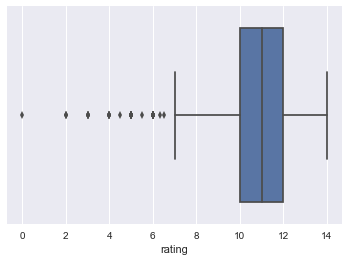

In [111]:
sns.boxplot(rating_breed['rating'])

if we take out outliers, we can see that most of rating falls between 10/10 to 14/10 with the mode is for 12/10.

Text(0.5,1,'Rating distribution')

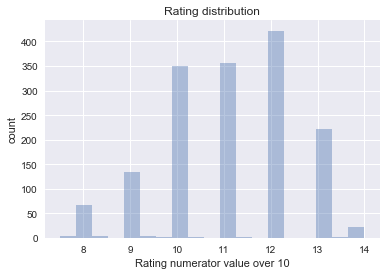

In [112]:
# taking only rating numerator greater than 7
sns.distplot(rating_breed[rating_breed.rating > 7]['rating'],
            kde=False)
plt.xlabel('Rating numerator value over 10')
plt.ylabel('count')
plt.title('Rating distribution')


Moving on, from the correlation matrix, below we see a strong relationship between favorite counts and retweet count, but also we can notice a moderate correlation between favorite count and the rating.

In [113]:
## generating correllation matrix
table_corr = rating_breed[rating_breed.rating > 7][['favorite_count', 
                                                    'retweet_count', 'rating']].corr()


Text(0.5,1,'Correlation Matrix')

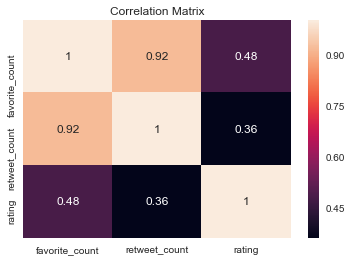

In [114]:
## adding it to sns heatmap
sns.heatmap(table_corr, annot=True);
plt.title('Correlation Matrix')

Well let’s dig deeper into this and plot rating numerator vs the Average of favorite count and retweet count: <br>
when the rating goes above 11/10 to 13/10 we notice that the favorite count trend increases as well as the retweet count trend. But what’s more interesting to look at is the spike below 10/10 in favorite count and retweet count which is a bit surprising. Well that’s the tweet that gained a lot of traction though the rating is actually 9.75/10. 

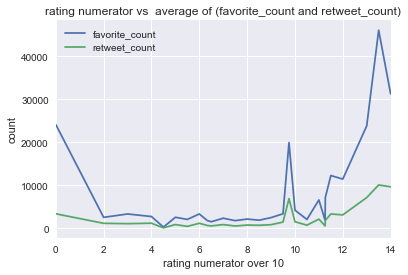

In [115]:
#grouping by rating and getting mean of favorite_count to plot
rating_breed.groupby('rating').mean()['favorite_count'].plot()
#grouping by rating and getting mean of retweet_count to plot
rating_breed.groupby('rating').mean()['retweet_count'].plot()
plt.title('rating numerator vs  average of (favorite_count and retweet_count)')
plt.xlabel('rating numerator over 10')
plt.ylabel('count')
plt.legend(['favorite_count', 'retweet_count']);

In [116]:
rating_breed[rating_breed.rating == 9.75 ]

,tweet_id,timestamp,source,text,expanded_urls,breed,prediction_confidence,favorite_count,retweet_count,dog_stage,rating,name
503,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,Pomeranian,0.467321,19893,6867,NaN,9.75,Logan


In [117]:
## extracting year and month from timestamp
## creating new columns year and month
rating_breed['year'] = rating_breed['timestamp'].dt.date.apply(lambda x: x.year)
rating_breed['month'] = rating_breed['timestamp'].dt.date.apply(lambda x: x.month)



c:\users\fbadr\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\fbadr\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [118]:
rating_breed.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1665 entries, 1 to 1993
Data columns (total 14 columns):
tweet_id                 1665 non-null int64
timestamp                1665 non-null datetime64[ns]
source                   1665 non-null object
text                     1665 non-null object
expanded_urls            1665 non-null object
breed                    1665 non-null category
prediction_confidence    1665 non-null float64
favorite_count           1665 non-null int64
retweet_count            1665 non-null int64
dog_stage                252 non-null category
rating                   1665 non-null float64
name                     1207 non-null object
year                     1665 non-null int64
month                    1665 non-null int64
dtypes: category(2), datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 149.9+ KB


In [119]:
## creating new date column format yyyy/mm 
rating_breed['date'] = rating_breed['year'].astype(str) + '/' + rating_breed['month'].astype(str)
rating_breed['date'] = pd.to_datetime(rating_breed['date'])

c:\users\fbadr\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\fbadr\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [120]:
rating_by_timestamp= rating_breed.copy()
# using pivot table where index is month column and column is year and the data inside is the actual rating
# Used in generating a Heatmap
rating_by_timestamp_pivot = rating_by_timestamp.pivot_table(index='month', columns='year', values='rating')



Now going back to the special rating methodology, I wanted to explore how the rating has evolved over time, using this heat map, below:

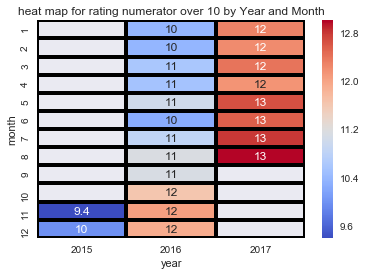

In [121]:
sns.heatmap(rating_by_timestamp_pivot,cmap='coolwarm', 
            linewidth=3, linecolor='black', annot=True);
plt.title('heat map for rating numerator over 10 by Year and Month');

It appears that the rating numerator has increased from 2015 up the August 2017. Well I am not sure if the standard of the rating system have changed over time, interesting enough this has sparked a debate back in September 2016, link: https://www.esquire.com/lifestyle/a54940/we-rate-dogs-matt-nelson-interview/. 

the plot below we clearly see that the average favorite count showing an upward trend overtime

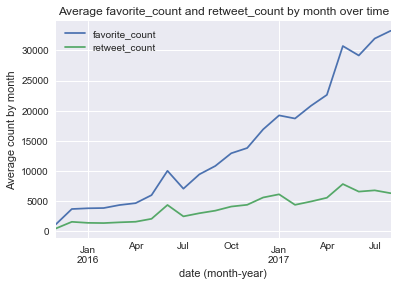

In [122]:
#lineplot for favorite_count and retweet_count
rating_breed.groupby(['date']).mean()['favorite_count'].plot()
rating_breed.groupby(['date']).mean()['retweet_count'].plot()
plt.title('Average favorite_count and retweet_count by month over time')
plt.xlabel('date (month-year)')
plt.ylabel('Average count by month')
plt.legend(['favorite_count', 'retweet_count']);

While the Rating tweets count per month appears to be in decline over time:

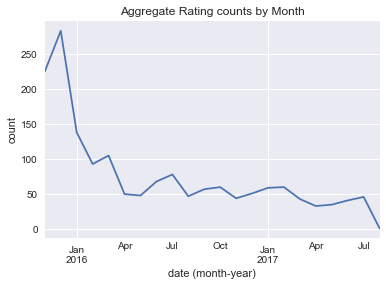

In [123]:
rating_breed.groupby(['date']).count()['rating'].plot();
plt.title('Aggregate Rating counts by Month')
plt.xlabel('date (month-year)')
plt.ylabel('count');

Moving to dog stages, though there were few observations where we were able to identify the dog stage from the tweet, but it is OK to mention that dog stage ‘puppo’ appears to have gained the highest Favorite count (computed in Median)

In [124]:
rating_breed.groupby('dog_stage').median().sort_values(by='favorite_count', 
                                                       ascending=False)['favorite_count'].head(10)


dog_stage
puppo      13144.0
doggo      11699.0
floofer    11625.5
pupper     3282.0 
Name: favorite_count, dtype: float64

In [125]:
rating_breed.groupby('dog_stage').count()['tweet_id']

dog_stage
doggo      54 
floofer    8  
pupper     168
puppo      22 
Name: tweet_id, dtype: int64

grouping by dog breeds, here are the top 15 dog breeds appearing in ‘WeRateDogs’ rating Tweets

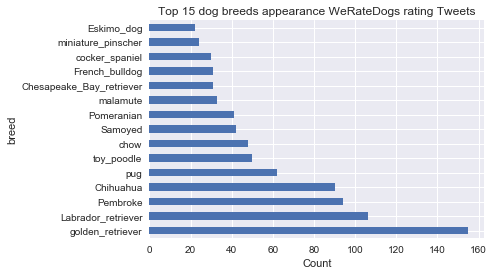

In [126]:
archive_master1['breed'].value_counts().head(15).plot.barh()
plt.title("Top 15 dog breeds appearance WeRateDogs rating Tweets")
plt.xlabel("Count")
plt.ylabel("breed");


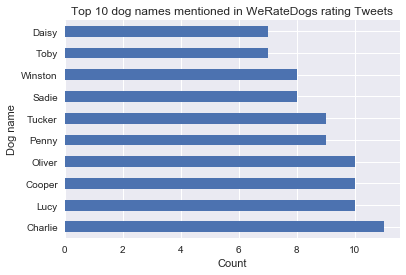

In [127]:
archive_master1['name'].value_counts().head(10).plot.barh();
plt.title("Top 10 dog names mentioned in WeRateDogs rating Tweets")
plt.xlabel("Count")
plt.ylabel("Dog name");

## Reference

https://stackoverflow.com/questions/17055117/python-json-dump-append-to-txt-with-each-variable-on-new-line?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa

https://stackoverflow.com/questions/48527420/if-elseif-else-condition-in-pandas-dataframe-list-comprehension?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa

https://stackoverflow.com/questions/43255167/pandas-pivot-table-for-heatmap?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa

https://stackoverflow.com/questions/37790429/seaborn-heatmap-using-pandas-dataframe?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object
https://www.esquire.com/lifestyle/a54940/we-rate-dogs-matt-nelson-interview/
https://docs.python.org/3/howto/regex.html